In [5]:
# 1. SETUP: IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plot style and size
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Part 1: Data Loading and Basic Exploration

In [8]:
try:
    df = pd.read_excel('/content/flight_price.xlsx')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: '/content/flight_price.xlsx' not found. Please upload the file.")
    # Create a placeholder DataFrame to allow the rest of the script to run
    df = pd.DataFrame({
        'Airline': ['IndiGo'], 'Date_of_Journey': ['24/03/2019'], 'Source': ['Banglore'],
        'Destination': ['New Delhi'], 'Route': ['BLR → DEL'], 'Dep_Time': ['22:20'],
        'Arrival_Time': ['01:10 22 Mar'], 'Duration': ['2h 50m'], 'Total_Stops': ['non-stop'],
        'Additional_Info': ['No info'], 'Price': [3897]
    })

Dataset loaded successfully.


In [9]:
# Display the first 5 and last 5 rows
print("\nFirst 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())


First 5 rows:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302



Last 5 rows:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
# Check for null/missing values and handle them
print("\nMissing values before cleaning:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("\nMissing values after dropping NaN rows:")
print(df.isnull().sum())


Missing values before cleaning:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Missing values after dropping NaN rows:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [11]:
# Display basic information and summary statistics
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
display(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB

Summary Statistics:


,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Part 2: Data Cleaning and Preprocessing

In [12]:
# Make a copy to preserve the original df if needed
df_processed = df.copy()


In [13]:
# Convert 'Date_of_Journey' to datetime and extract features
df_processed['Date_of_Journey'] = pd.to_datetime(df_processed['Date_of_Journey'], format='%d/%m/%Y')
df_processed['Journey_Day'] = df_processed['Date_of_Journey'].dt.day
df_processed['Journey_Month'] = df_processed['Date_of_Journey'].dt.month

In [14]:
# Convert time columns to datetime and extract features
df_processed['Dep_Time'] = pd.to_datetime(df_processed['Dep_Time'], format='%H:%M').dt.time
df_processed['Arrival_Time'] = pd.to_datetime(df_processed['Arrival_Time']).dt.time
df_processed['Dep_Hour'] = df_processed['Dep_Time'].apply(lambda x: x.hour)
df_processed['Dep_Min'] = df_processed['Dep_Time'].apply(lambda x: x.minute)
df_processed['Arrival_Hour'] = df_processed['Arrival_Time'].apply(lambda x: x.hour)
df_processed['Arrival_Min'] = df_processed['Arrival_Time'].apply(lambda x: x.minute)

/tmp/ipython-input-476377294.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['Arrival_Time'] = pd.to_datetime(df_processed['Arrival_Time']).dt.time


In [15]:
# Convert 'Duration' to total minutes
def duration_to_minutes(duration):
    h = 0
    m = 0
    if 'h' in duration:
        h = int(duration.split('h')[0])
    if 'm' in duration:
        parts = duration.split(' ')
        for part in parts:
            if 'm' in part:
                m = int(part.replace('m', ''))
    return h * 60 + m

df_processed['Duration_min'] = df_processed['Duration'].apply(duration_to_minutes)

In [16]:
# Handle 'Total_Stops' by mapping to numerical values
stops_map = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df_processed['Total_Stops'] = df_processed['Total_Stops'].map(stops_map)

In [17]:
# Drop original time/duration columns and other redundant ones
df_processed.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route', 'Additional_Info'], axis=1, inplace=True)

In [18]:
# Encode categorical features
df_encoded = pd.get_dummies(df_processed, drop_first=True)

print("\nData preprocessing complete. Cleaned DataFrame head:")
display(df_processed.head())



Data preprocessing complete. Cleaned DataFrame head:


,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


# Part 3: Univariate Analysis

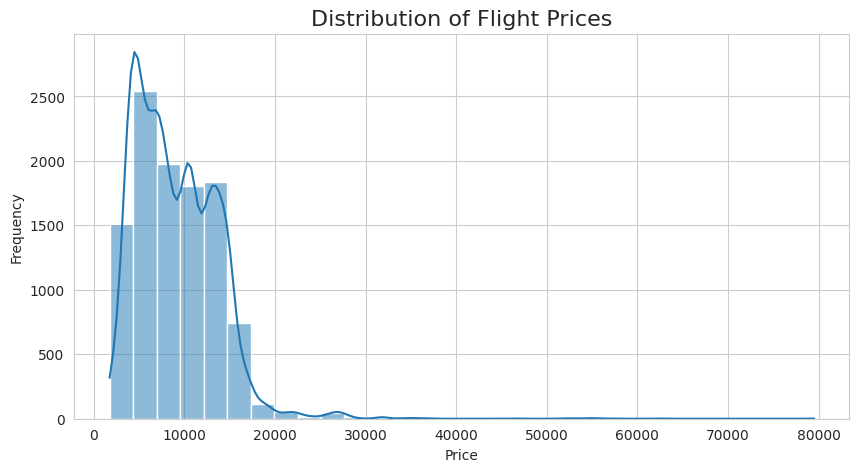

In [19]:
# Visualize the distribution of Price
plt.figure(figsize=(10, 5))
sns.histplot(df_processed['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

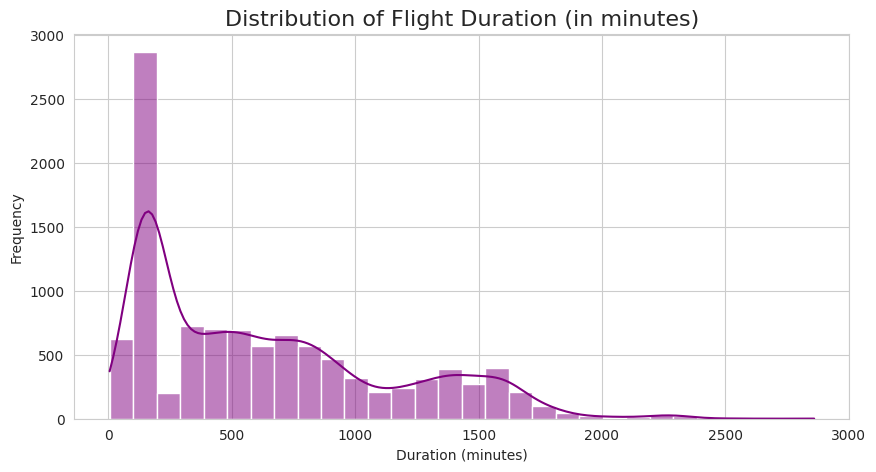

In [20]:
# Visualize the distribution of Duration
plt.figure(figsize=(10, 5))
sns.histplot(df_processed['Duration_min'], bins=30, kde=True, color='purple')
plt.title('Distribution of Flight Duration (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

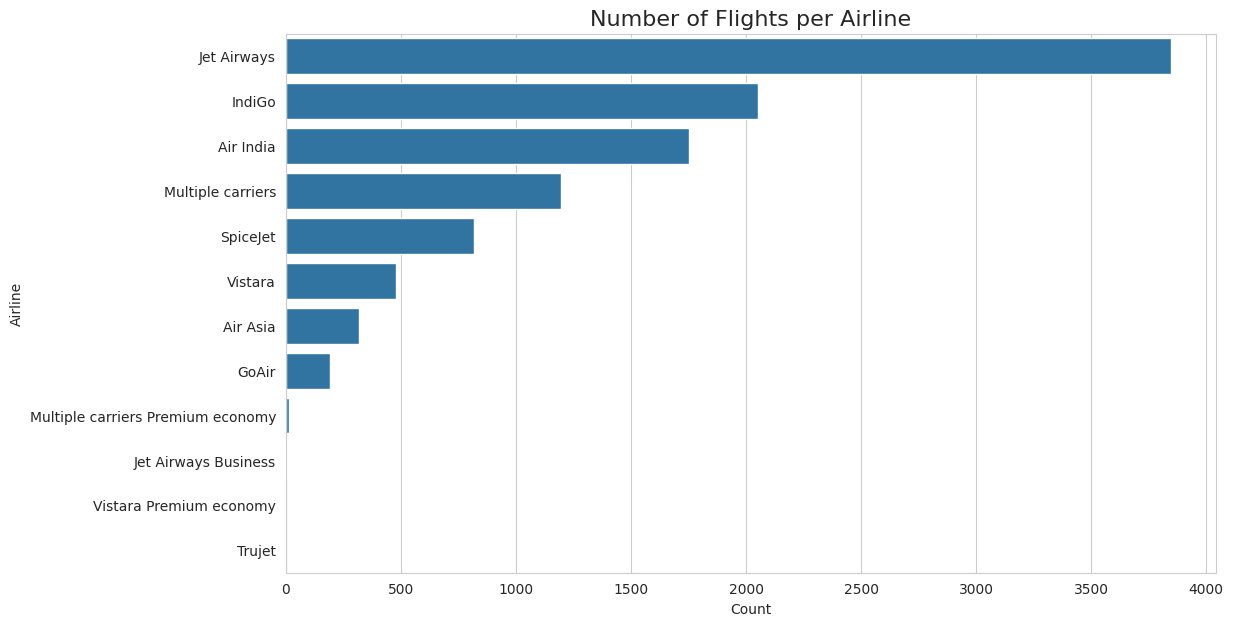

In [21]:
# Count plot of flights per Airline
plt.figure(figsize=(12, 7))
sns.countplot(y='Airline', data=df_processed, order=df_processed['Airline'].value_counts().index)
plt.title('Number of Flights per Airline', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

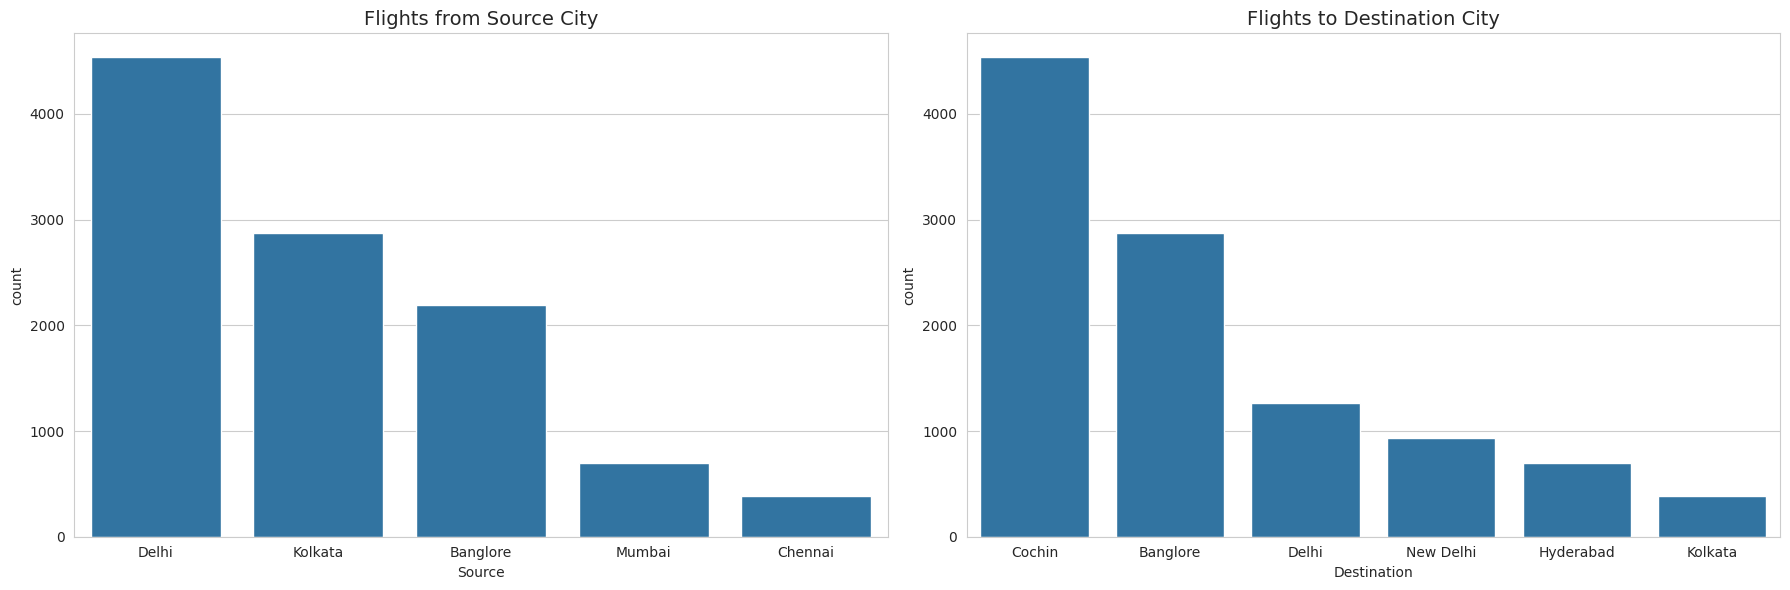

In [22]:
# Count plot of flights per Source and Destination
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x='Source', data=df_processed, ax=axes[0], order=df_processed['Source'].value_counts().index)
axes[0].set_title('Flights from Source City', fontsize=14)
sns.countplot(x='Destination', data=df_processed, ax=axes[1], order=df_processed['Destination'].value_counts().index)
axes[1].set_title('Flights to Destination City', fontsize=14)
plt.tight_layout()
plt.show()

# Part 4: Bivariate & Multivariate Analysis

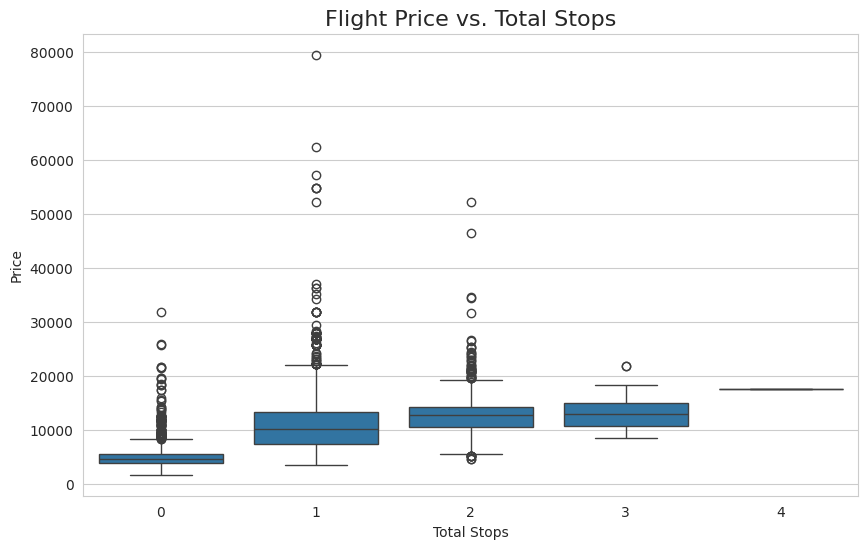

In [23]:
# Plot Price vs. Total Stops
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df_processed)
plt.title('Flight Price vs. Total Stops', fontsize=16)
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

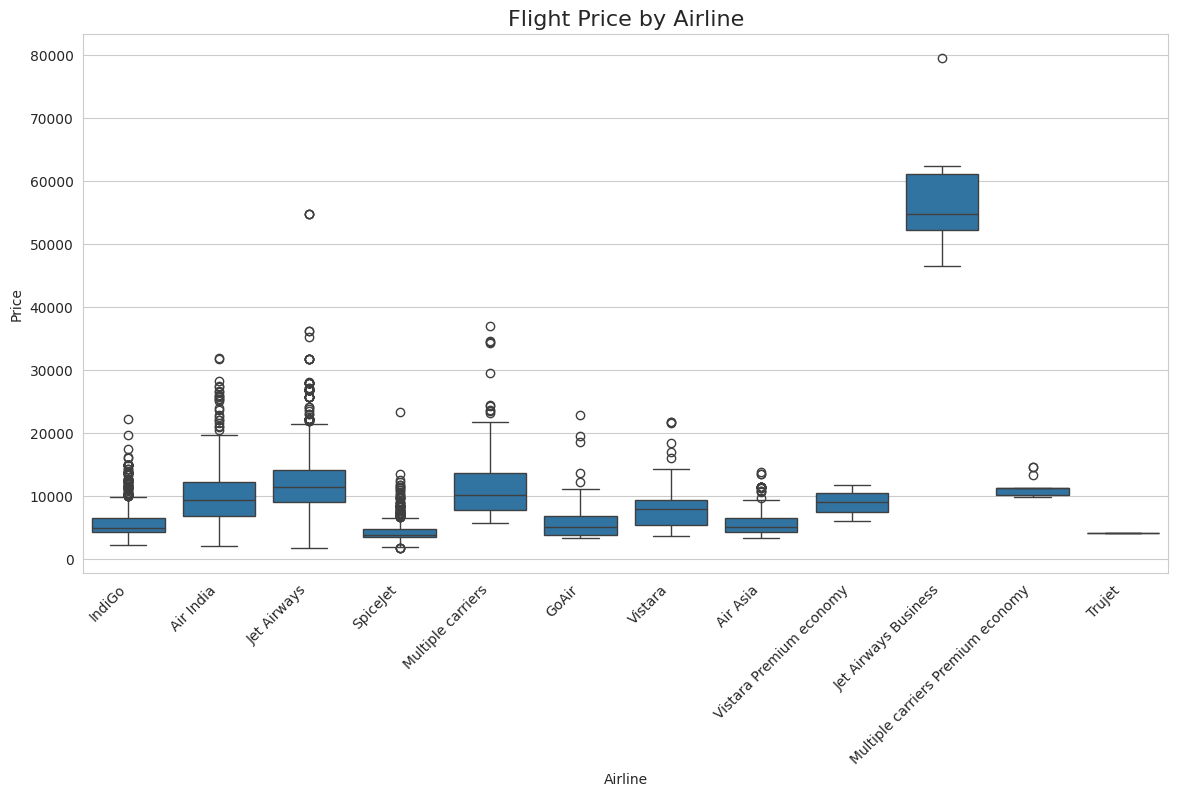

In [24]:
# Compare average flight prices by Airline
plt.figure(figsize=(14, 7))
sns.boxplot(x='Airline', y='Price', data=df_processed)
plt.title('Flight Price by Airline', fontsize=16)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

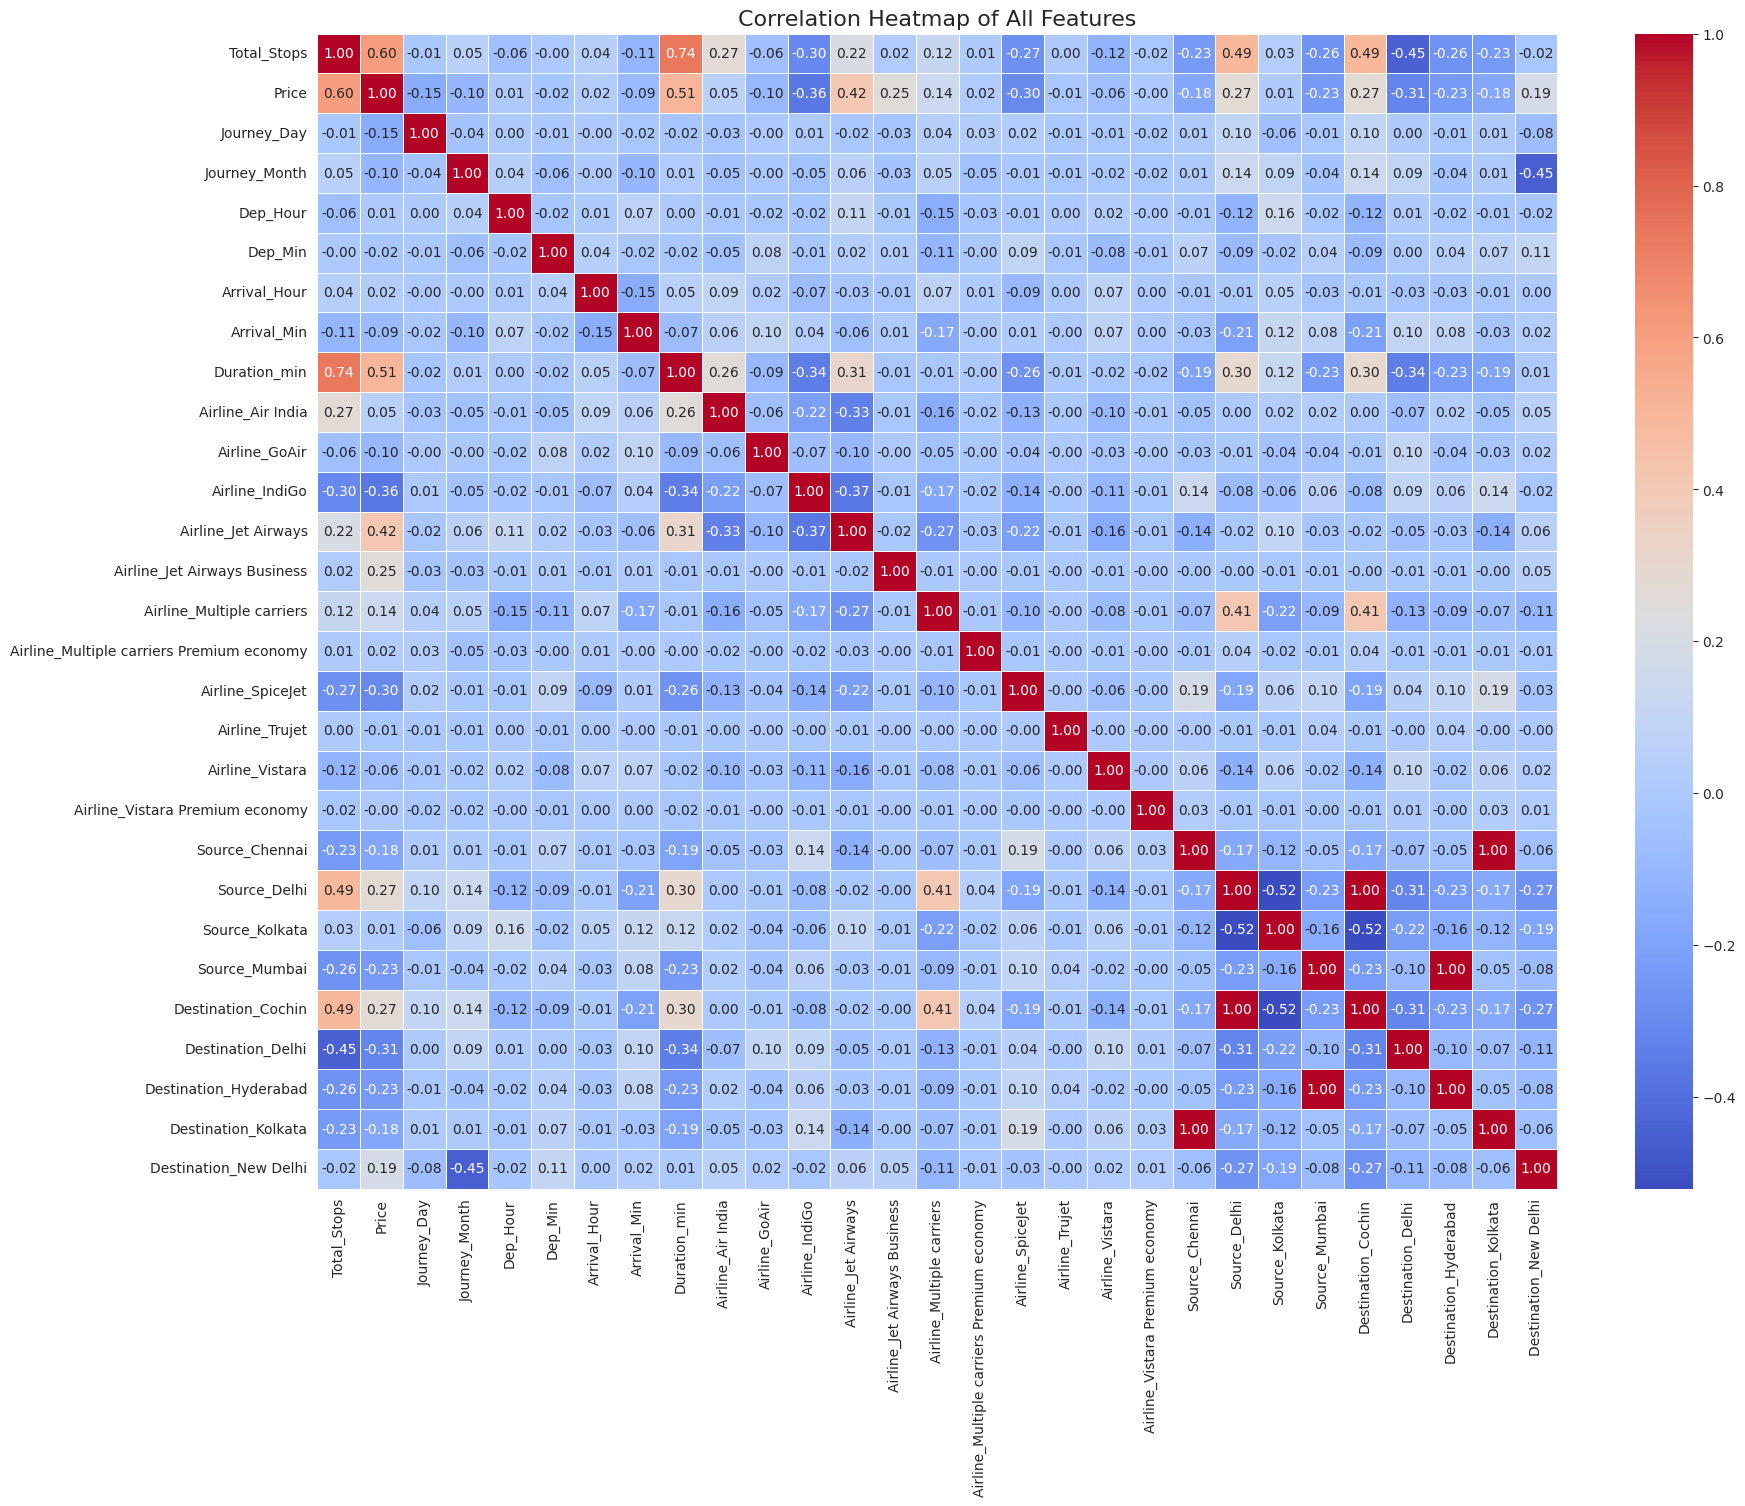

In [25]:
# Correlation heatmap for numeric features (using the one-hot encoded dataframe)
plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

# Part 5: Feature Engineering (Bonus)

In [26]:
# Create 'Time of Day' feature from departure hour
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_processed['Dep_Time_of_Day'] = df_processed['Dep_Hour'].apply(get_time_of_day)

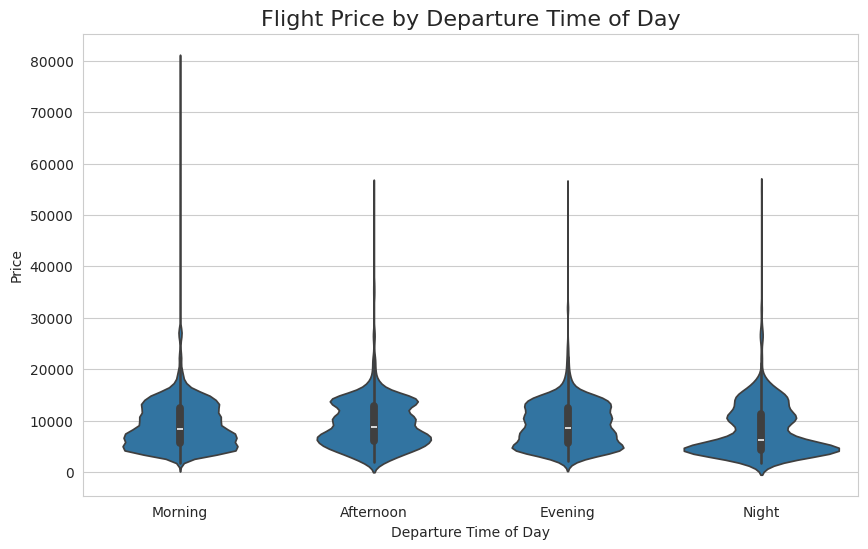


--- End of Assignment ---


In [27]:
# Explore how the new feature relates to price
plt.figure(figsize=(10, 6))
order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.violinplot(x='Dep_Time_of_Day', y='Price', data=df_processed, order=order)
plt.title('Flight Price by Departure Time of Day', fontsize=16)
plt.xlabel('Departure Time of Day')
plt.ylabel('Price')
plt.show()

print("\n--- End of Assignment ---")